In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
cd "/content/drive/My Drive/Norbert/NLP/"

/content/drive/My Drive/Norbert/NLP


In [6]:
ls

proppy_1.0.dev.tsv  proppy_1.0.test.tsv  proppy_1.0.train.tsv


In [7]:
# Importing Necessary libraries

import nltk
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


In [10]:
column_names = ['text', 'location', 'tone', 'date', 'ID','URL','MBFC_factuality_label', 'URL.1',
                'MBFC_factuality_label.1','URL_to_MBFC_page', 'source_name', 'MBFC_notes_about_source',
               'MBFC_bias_label','source_URL','propaganda_label']

In [12]:
# Loading training data

train_data = pd.read_csv('proppy_1.0.train.tsv', sep='\t', names =column_names)

train_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,"Et tu, Rhody? A recent editorial in the Provi...","Rhode Island, United States",-3.181818,2018-02-02,727600136,http://www.courant.com/opinion/editorials/hc-e...,unknown,"Editorial: Why, Rhode Island, Why?",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,A recent post in The Farmington Mirror — our t...,"Rhode Island, United States",-0.424328,2018-02-17,731714618,http://www.courant.com/features/hc-fea-avoidin...,Teresa M. Pelham,A Tip For Navigating The Dreaded School Drop-O...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,"President Donald Trump, as he often does while...","Florida, United States",-2.469136,2018-02-17,731714635,http://www.courant.com/nation-world/ct-trump-f...,Josh Dawsey,Trump focuses on praising first responders in ...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,"February is Black History Month, and nothing l...","Bristol, Bristol, City of, United Kingdom",-0.894632,2018-02-06,728627182,http://www.courant.com/entertainment/museums-g...,Susan Dunne,"African Slave-Trading Center, Frederick Dougla...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,"The snow was so heavy, whipped up by gusting w...","Connecticut, United States",-4.800000,2018-02-06,728627443,http://www.courant.com/weather/hc-br-blizzard-...,Nicholas Rondinone,"40 Years Ago, Blizzard Of '78 Walloped Connect...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [13]:
train_data.propaganda_label.unique()

array([-1,  1])

In [14]:
# Loading validation data

valid_data = pd.read_csv('proppy_1.0.dev.tsv', sep='\t', names =column_names)

valid_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,Convened to examine the causes of civil unrest...,"Chicago, Illinois, United States",-4.593640,2018-02-27,734202079,http://www.courant.com/nation-world/ct-no-prog...,Tracy Jan,Report: No progress for African-Americans on h...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,Discriminating against someone on the basis of...,"Chicago, Illinois, United States",-1.566952,2018-02-27,734203497,http://www.courant.com/nation-world/ct-anti-di...,Matt Zapotosky,Employers can't discriminate based on sexual o...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,"Bill Cosby's 44-year-old daughter, Ensa Cosby,...","Philadelphia, Pennsylvania, United States",-6.150660,2018-02-27,734204589,http://www.courant.com/entertainment/ct-cosby-...,Bob Salsberg,"Bill Cosby's daughter Ensa, 44, dies in Massac...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,"The fast-moving, powerful theatrical locomotiv...","New York, United States",1.524390,2018-02-27,734213466,http://www.courant.com/entertainment/arts-thea...,Christopher Arnott,"'Murder On The Orient Express' A Funny, Fast-P...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,It's Friday. It's National Pizza Day. Grab lif...,"West Hartford, Connecticut, United States",1.197605,2018-02-09,729554384,http://www.courant.com/features/food/hc-nation...,Nicholas Rondinone,You Can Celebrate National Pizza Day Right Here,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [15]:
# Loading testing data

test_data = pd.read_csv('proppy_1.0.test.tsv', sep='\t', names =column_names)

test_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,Eat in Connecticut teamed up with End Hunger C...,"Shiraz, Fars, Iran",0.781250,2018-02-05,728352356,http://www.courant.com/community/west-hartford...,Dennis Hohenberger,Pub Crawl Benefits End Hunger Connecticut,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,Owners of an old Pennsylvania power plant that...,"Brunner Island, Pennsylvania, United States",-1.615799,2018-02-15,730955196,http://www.courant.com/politics/hc-pol-brunner...,Gregory B. Hladky,Sierra Club Reaches Deal On Plant Polluting Co...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,The majority owner of President Donald Trump's...,"Manhattan, New York, United States",-4.177546,2018-02-25,733772812,http://www.courant.com/nation-world/ct-trump-p...,Ana Cerrud,"Police, yelling, power turned off: Confrontati...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,Connecticut’s most likely option for using tol...,"Connecticut, United States",-7.200811,2018-01-04,727857752,http://www.courant.com/politics/hc-pol-toll-co...,Gregory B. Hladky,'Congestion Pricing' Is A Likely Option If Con...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,Escaped prisoner Jerry Mercado is back in Conn...,"Georgia, United States",-6.534091,2018-02-03,727792592,http://www.courant.com/breaking-news/hc-prison...,David Owens,Escaped Prisoner Jerry Mercado Back In Connect...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [16]:
print("Train shape:",train_data.shape)
print("valid shape:",valid_data.shape)
print("Test shape:",test_data.shape)

Train shape: (35986, 15)
valid shape: (5125, 15)
Test shape: (10159, 15)


# Data Cleaning

In [17]:
train_data.head()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
0,"Et tu, Rhody? A recent editorial in the Provi...","Rhode Island, United States",-3.181818,2018-02-02,727600136,http://www.courant.com/opinion/editorials/hc-e...,unknown,"Editorial: Why, Rhode Island, Why?",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
1,A recent post in The Farmington Mirror — our t...,"Rhode Island, United States",-0.424328,2018-02-17,731714618,http://www.courant.com/features/hc-fea-avoidin...,Teresa M. Pelham,A Tip For Navigating The Dreaded School Drop-O...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
2,"President Donald Trump, as he often does while...","Florida, United States",-2.469136,2018-02-17,731714635,http://www.courant.com/nation-world/ct-trump-f...,Josh Dawsey,Trump focuses on praising first responders in ...,HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
3,"February is Black History Month, and nothing l...","Bristol, Bristol, City of, United Kingdom",-0.894632,2018-02-06,728627182,http://www.courant.com/entertainment/museums-g...,Susan Dunne,"African Slave-Trading Center, Frederick Dougla...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1
4,"The snow was so heavy, whipped up by gusting w...","Connecticut, United States",-4.800000,2018-02-06,728627443,http://www.courant.com/weather/hc-br-blizzard-...,Nicholas Rondinone,"40 Years Ago, Blizzard Of '78 Walloped Connect...",HIGH,http://mediabiasfactcheck.com/the-hartford-cou...,The Hartford Courant,The Hartford Courant is the largest daily news...,leftcenter06,courant.com,-1


In [18]:
train_data.tail()

,text,location,tone,date,ID,URL,MBFC_factuality_label,URL.1,MBFC_factuality_label.1,URL_to_MBFC_page,source_name,MBFC_notes_about_source,MBFC_bias_label,source_URL,propaganda_label
35981,From The Telegraph: Towns in Brazil have beco...,"Hollywood, California, United States",-3.193277,2018-09-10,785781276,https://www.lewrockwell.com/2018/09/no_author/...,NaN,Escape to Boa Vista,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35982,The second episode of Consortium News on Flash...,"Pacifica, California, United States",0.526316,2018-09-10,785781322,https://www.lewrockwell.com/2018/09/no_author/...,Jim Macgregor,Flash Points,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35983,"It is beginning. Actually, it’s been happenin...","White House, District of Columbia, United States",-3.455285,2018-09-10,785781455,https://www.lewrockwell.com/2018/09/eric-peter...,Eric Peters,Tesla’s Death Dive,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35984,Justin’s note: As regular Dispatch readers kno...,United States,-1.052049,2018-09-10,785781711,https://www.lewrockwell.com/2018/09/doug-casey...,Doug Casey,Doug Casey on the ‘Politically Correct’ Movement,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1
35985,“No man can serve two masters” (Matthew 6:24)....,United States,0.256410,2018-09-11,786060460,https://www.lewrockwell.com/2018/09/laurence-m...,Laurence M. Vance,Serving Two Masters,unknown,unknown,lewrockwell.com,unknown,unknown,lewrockwell.com,1


In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35986 entries, 0 to 35985
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     35986 non-null  object 
 1   location                 35986 non-null  object 
 2   tone                     35986 non-null  float64
 3   date                     35986 non-null  object 
 4   ID                       35986 non-null  int64  
 5   URL                      35986 non-null  object 
 6   MBFC_factuality_label    26902 non-null  object 
 7   URL.1                    35986 non-null  object 
 8   MBFC_factuality_label.1  35986 non-null  object 
 9   URL_to_MBFC_page         35986 non-null  object 
 10  source_name              35986 non-null  object 
 11  MBFC_notes_about_source  29979 non-null  object 
 12  MBFC_bias_label          35986 non-null  object 
 13  source_URL               35986 non-null  object 
 14  propaganda_label      

In [20]:
train_data['text'][100]

'Prosecutors filed felony charges on Wednesday against an immigrant illegally living in the U.S. who is suspected in a drunken-driving crash that killed Indianapolis Colts linebacker Edwin Jackson and an Uber driver.  Manuel Orrego-Savala, who is from Guatemala and has twice been deported from the U.S., is charged with causing death while driving intoxicated and leaving the scene of an accident. The 37-year-old said little during his initial court hearing, responding through an interpreter as the judge explained the proceedings and charges.  "He\'s very distraught to say the least," said his lawyer, Jorge Torres. "He\'s very confused."  Investigators said Orrego-Savala was driving the pickup truck that hit Jackson and his Uber driver, 54-year-old Jeffrey Monroe, while the men were standing outside Monroe\'s car early Sunday along Interstate 70. Court documents allege a blood test conducted at a hospital determined Orrego-Savala had a blood-alcohol level of 0.19 percent, more than doubl

In [22]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5125 entries, 0 to 5124
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     5125 non-null   object 
 1   location                 5125 non-null   object 
 2   tone                     5125 non-null   float64
 3   date                     5125 non-null   object 
 4   ID                       5125 non-null   int64  
 5   URL                      5125 non-null   object 
 6   MBFC_factuality_label    3451 non-null   object 
 7   URL.1                    5125 non-null   object 
 8   MBFC_factuality_label.1  5125 non-null   object 
 9   URL_to_MBFC_page         5125 non-null   object 
 10  source_name              5125 non-null   object 
 11  MBFC_notes_about_source  4513 non-null   object 
 12  MBFC_bias_label          5125 non-null   object 
 13  source_URL               5125 non-null   object 
 14  propaganda_label        

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10159 entries, 0 to 10158
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   text                     10159 non-null  object 
 1   location                 10159 non-null  object 
 2   tone                     10159 non-null  float64
 3   date                     10159 non-null  object 
 4   ID                       10159 non-null  int64  
 5   URL                      10159 non-null  object 
 6   MBFC_factuality_label    6634 non-null   object 
 7   URL.1                    10159 non-null  object 
 8   MBFC_factuality_label.1  10159 non-null  object 
 9   URL_to_MBFC_page         10159 non-null  object 
 10  source_name              10159 non-null  object 
 11  MBFC_notes_about_source  8961 non-null   object 
 12  MBFC_bias_label          10159 non-null  object 
 13  source_URL               10159 non-null  object 
 14  propaganda_label      

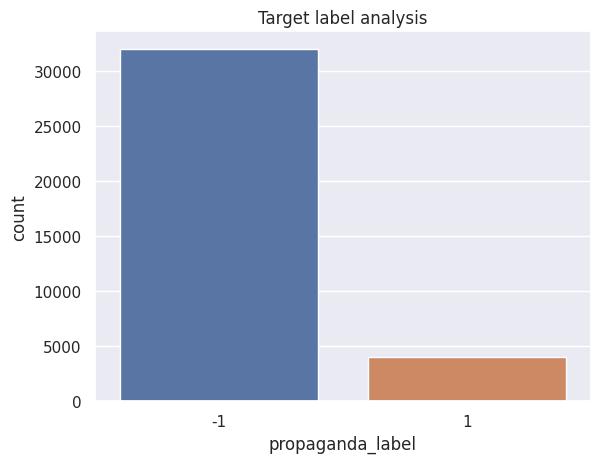

In [27]:
# Target label analysis
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='darkgrid')
count_plt = sns.countplot(x=train_data['propaganda_label'], data=train_data['propaganda_label'])
count_plt.set_title('Target label analysis')
plt.show()

In [28]:
train_data['propaganda_label'].nunique()

2

# Preprocessing

1. Lowercasing the text

In [30]:
train_data['text_preprocessed'] = train_data['text'].str.lower()


In [31]:
train_data['text_preprocessed'][100]

'prosecutors filed felony charges on wednesday against an immigrant illegally living in the u.s. who is suspected in a drunken-driving crash that killed indianapolis colts linebacker edwin jackson and an uber driver.  manuel orrego-savala, who is from guatemala and has twice been deported from the u.s., is charged with causing death while driving intoxicated and leaving the scene of an accident. the 37-year-old said little during his initial court hearing, responding through an interpreter as the judge explained the proceedings and charges.  "he\'s very distraught to say the least," said his lawyer, jorge torres. "he\'s very confused."  investigators said orrego-savala was driving the pickup truck that hit jackson and his uber driver, 54-year-old jeffrey monroe, while the men were standing outside monroe\'s car early sunday along interstate 70. court documents allege a blood test conducted at a hospital determined orrego-savala had a blood-alcohol level of 0.19 percent, more than doubl

#### 2 Decontractions of Words

In [32]:
## deconstructions of word means won't -> will not, can't -> can not, he's -> he is

train_data['text_preprocessed'] = train_data['text_preprocessed'].str.replace(r"won\'t", "will not")\
                                        .str.replace(r"can\'t", "can not")\
                                        .str.replace(r"n\'t", " not")\
                                        .str.replace(r"\'re", " are")\
                                        .str.replace("\’s", " is")\
                                        .str.replace(r"\'d", " would")\
                                        .str.replace(r"\'ll", " will")\
                                        .str.replace(r"\'t", " not")\
                                        .str.replace(r"\'ve", " have")\
                                        .str.replace(r"\'m", " am")\
                                        .str.replace("\'s", " is")

train_data['text_preprocessed'][100]

'prosecutors filed felony charges on wednesday against an immigrant illegally living in the u.s. who is suspected in a drunken-driving crash that killed indianapolis colts linebacker edwin jackson and an uber driver.  manuel orrego-savala, who is from guatemala and has twice been deported from the u.s., is charged with causing death while driving intoxicated and leaving the scene of an accident. the 37-year-old said little during his initial court hearing, responding through an interpreter as the judge explained the proceedings and charges.  "he is very distraught to say the least," said his lawyer, jorge torres. "he is very confused."  investigators said orrego-savala was driving the pickup truck that hit jackson and his uber driver, 54-year-old jeffrey monroe, while the men were standing outside monroe is car early sunday along interstate 70. court documents allege a blood test conducted at a hospital determined orrego-savala had a blood-alcohol level of 0.19 percent, more than doubl